#### SQLite is a server-less database and is self-contained. This is also referred to as an embedded database which means the DB engine runs as a part of the app. 

### Connecting to Database

In [1]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('test.db')
conn.close()

### Create a Table

In [2]:
conn = sqlite3.connect('test.db')

conn.execute('''CREATE TABLE FELLOWS
         (ID INTEGER PRIMARY KEY AUTOINCREMENT  NOT NULL ,
         NAME           CHAR(50)    NOT NULL,
         AGE            INT     NOT NULL,
         ADDRESS        CHAR(50),
         SALARY         DECIMAL);''')

conn.close()

### Check table if exists

In [ ]:
conn = sqlite3.connect('test.db')

conn.execute('''CREATE TABLE IF NOT EXISTS FELLOWS
          (ID INTEGER PRIMARY KEY AUTOINCREMENT  NOT NULL ,
         NAME           CHAR(50)    NOT NULL,
         AGE            INT     NOT NULL,
         ADDRESS        CHAR(50),
         SALARY         DECIMAL);''')

conn.close()

### Insert Operation

In [3]:
conn = sqlite3.connect('test.db')

conn.execute("INSERT INTO FELLOWS (NAME,AGE,ADDRESS,SALARY) \
      VALUES ('Dan', 22, 'Korea', 50000.00 )");

conn.execute("INSERT INTO FELLOWS (NAME,AGE,ADDRESS,SALARY) \
      VALUES ('Rob', 20, 'United Kingdom', 80000.00 )");

conn.execute("INSERT INTO FELLOWS (NAME,AGE,ADDRESS,SALARY) \
      VALUES ('Emer', 20, 'Japan', 80000.00 )");

conn.execute("INSERT INTO FELLOWS (NAME,AGE,ADDRESS,SALARY) \
      VALUES ('Franz', 18, 'Australia', 65000.00 )");

conn.execute("INSERT INTO FELLOWS (NAME,AGE,ADDRESS,SALARY) \
      VALUES ('Phonso', 20, 'Singapore', 65000.00 )");

conn.commit()
conn.close()

### Avoiding SQL INJECTION

In [ ]:
conn = sqlite3.connect('test.db')

conn.execute("insert into FELLOWS(NAME, AGE, ADDRESS, SALARY) values(?, ?, ?, ?)", ('Ran', '18', 'Philippines', 20000.00))
conn.commit()
conn.close()

### Select All Operation

In [6]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT id, name, address, salary from FELLOWS order by Salary desc")

result = {}
result['ID'] = []
result['NAME'] = []
result['ADDRESS'] = []
result['SALARY'] = []

for row in cursor:
    print("ID = ", row[0], 'Name=', row[1], 'Address=', row[2], 'Salary=', row[3])
    result['ID'].append(row[0])
    result['NAME'].append(row[1])
    result['ADDRESS'].append(row[2])
    result['SALARY'].append(row[3])
    
conn.close()

df = pd.DataFrame.from_dict(result)
df

ID =  2 Name= Rob Address= United Kingdom Salary= 80000
ID =  3 Name= Emer Address= Japan Salary= 80000
ID =  4 Name= Franz Address= Australia Salary= 65000
ID =  5 Name= Phonso Address= Singapore Salary= 65000
ID =  1 Name= Dan Address= Korea Salary= 50000


,ID,NAME,ADDRESS,SALARY
0,2,Rob,United Kingdom,80000
1,3,Emer,Japan,80000
2,4,Franz,Australia,65000
3,5,Phonso,Singapore,65000
4,1,Dan,Korea,50000


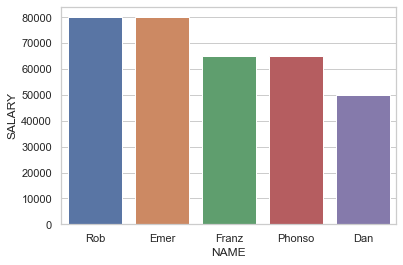

In [7]:
import seaborn as sns

sns.set_theme(style="whitegrid")

ax = sns.barplot(x=df['NAME'], y=df['SALARY'])

### DELETE INFORMATION

In [ ]:
conn = sqlite3.connect('test.db')

conn.execute("DELETE FROM FELLOWS")
conn.commit()
conn.close()

### Using Where Clause

In [ ]:
conn = sqlite3.connect('test.db')

cursor = conn.execute("SELECT id, name, address, salary from FELLOWS where name = ?", ['Dan'])

result = {}
result['ID'] = []
result['NAME'] = []
result['ADDRESS'] = []
result['SALARY'] = []

for row in cursor:
    print("ID = ", row[0], 'Name=', row[1], 'Address=', row[2], 'Salary=', row[3])
    result['ID'].append(row[0])
    result['NAME'].append(row[1])
    result['ADDRESS'].append(row[2])
    result['SALARY'].append(row[3])

conn.close()

pd.DataFrame.from_dict(result)

### Update Operation

In [ ]:
conn = sqlite3.connect('test.db')

conn.execute("UPDATE FELLOWS set SALARY = 100000.00 where ID = ?", [1])
conn.commit()
cursor = conn.execute("SELECT id, name, address, salary from FELLOWS")
result = {}
result['ID'] = []
result['NAME'] = []
result['ADDRESS'] = []
result['SALARY'] = []

for row in cursor:
    print("ID = ", row[0], 'Name=', row[1], 'Address=', row[2], 'Salary=', row[3])
    
    result['ID'].append(row[0])
    result['NAME'].append(row[1])
    result['ADDRESS'].append(row[2])
    result['SALARY'].append(row[3])
    
conn.close()

pd.DataFrame.from_dict(result)

### DELETE ALL INFORMATION

In [ ]:
conn = sqlite3.connect('test.db')

conn.execute("DELETE FROM FELLOWS")
conn.commit()
conn.close()

In [ ]:
conn = sqlite3.connect('test.db')

conn.execute("DELETE from COMPANY where ID = 2;")
conn.commit()

cursor = conn.execute("SELECT id, name, address, salary from COMPANY")
result = {}
result['ID'] = []
result['NAME'] = []
result['ADDRESS'] = []
result['SALARY'] = []

for row in cursor:
    print("ID = ", row[0], 'Name=', row[1], 'Address=', row[2], 'Salary=', row[3])
    
    result['ID'].append(row[0])
    result['NAME'].append(row[1])
    result['ADDRESS'].append(row[2])
    result['SALARY'].append(row[3])
    
conn.close()

pd.DataFrame.from_dict(result)